# Improving customer experience for Comcast

In [1]:
import pandas as pd

Comcast_Dataset = pd.read_csv('Comcast_telecom_complaints_data.csv')
Comcast_Dataset = Comcast_Dataset.rename(columns={'Ticket #':'Ticket'})

Comcast_Dataset

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [2]:
#adding new column DateTime

import datetime
import numpy as np

DateTime=[0]*Comcast_Dataset.shape[0]

for i in range(Comcast_Dataset.shape[0]):
    D = Comcast_Dataset.Date[i]
    t = Comcast_Dataset.Time[i]
    Dtj = D + t  
    DateTime[i] = datetime.datetime.strptime(Dtj, '%d-%m-%y%I:%M:%S %p')

Comcast_Dataset.insert(11, 'DateTime', DateTime)

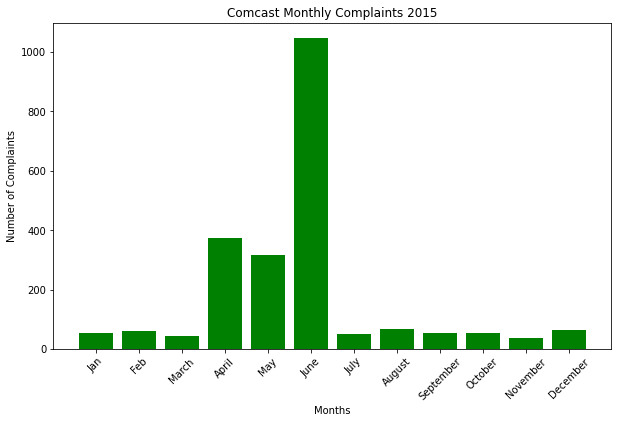

In [3]:
#plotting monthly complaints frequency

import matplotlib.pyplot as plt

from collections import Counter
Months=[0]*Comcast_Dataset.shape[0]
for i in range(Comcast_Dataset.shape[0]):
    Months[i]=Comcast_Dataset.DateTime[i].month
    
Month=Counter(Months)
f=[0]*12

for i in range(12):
    f[i]=Month[i+1]
M = ['Jan','Feb','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(10,6))
plt.title("Comcast Monthly Complaints 2015")
plt.bar(M,f, color='g')
plt.xticks(rotation=45)
plt.xlabel("Months")
plt.ylabel("Number of Complaints")
plt.show()

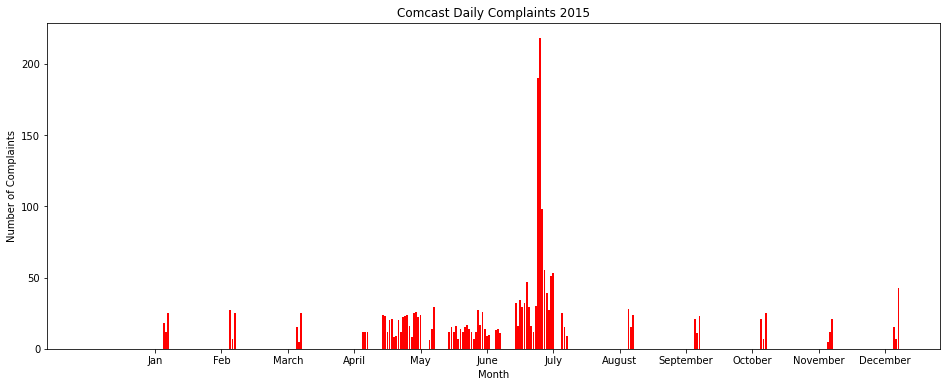

In [4]:
#plotting daily complaints

Days=[0]*Comcast_Dataset.shape[0]
for i in range(Comcast_Dataset.shape[0]):
    Days[i] = Comcast_Dataset.DateTime[i].month*30+Comcast_Dataset.DateTime[i].day
    
Day=Counter(Days)
f=[0]*370
g=[0]*370

for i in Day:
    f[i]=Day[i]
    g[i]=i
    #print(Day[i])

m = np.arange(30,365,30)
M = ['Jan','Feb','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(16,6))
plt.title("Comcast Daily Complaints 2015")
plt.bar(g,f, color='r')
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.xticks(m,M)#, rotation=45)
plt.show()

In [5]:
#Creating new status with just two categories - Open & Closed

Status_New=[0]*Comcast_Dataset.shape[0]
#Comcast_Dataset.Status.value_counts()
for i in range(Comcast_Dataset.shape[0]):
    if Comcast_Dataset.Status[i]=='Open' or Comcast_Dataset.Status[i]=='Pending':
        Status_New[i]='Open'
    else:
        Status_New[i]='Closed'
Comcast_Dataset.insert(12, 'Status_New', Status_New)
Comcast_Dataset

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime,Status_New
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04 09:13:18,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06 13:24:39,Closed
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06 17:28:41,Closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-06-23 23:13:30,Closed


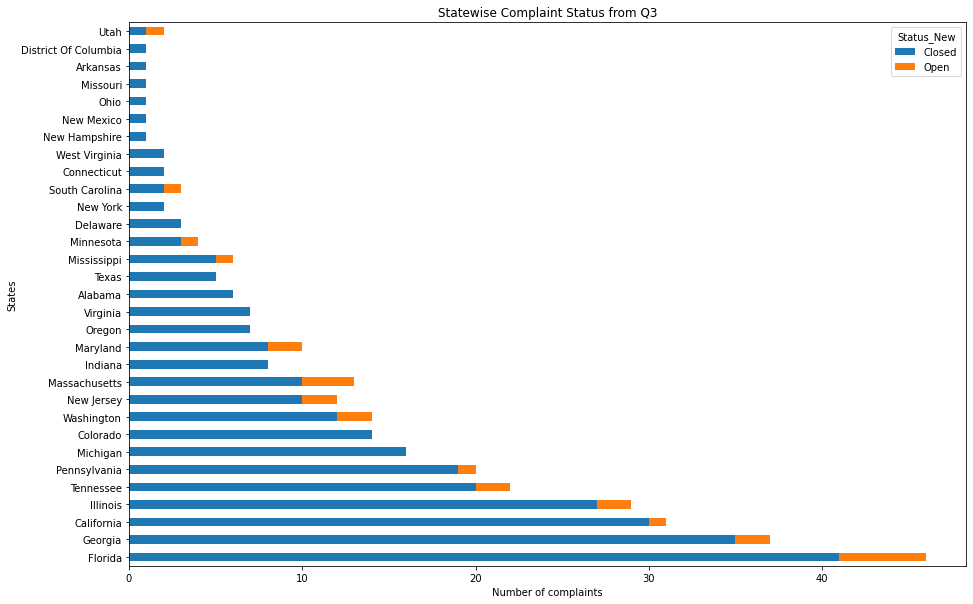

As seen in the above graph, Florida has maximum number of complaints from Quater 3, having total 46 complaints


In [7]:
#Plotting statewise complaints from Q3

DT=[0]*Comcast_Dataset.shape[0]
Month=[0]*Comcast_Dataset.shape[0]

for i in range(Comcast_Dataset.shape[0]):
    D = Comcast_Dataset.Date[i]
    t = Comcast_Dataset.Time[i]
    Dtj = D + t  
    DT[i] = datetime.datetime.strptime(Dtj, '%d-%m-%y%I:%M:%S %p')
    Month[i] = DT[i].month

Comcast_Dataset.insert(13, 'Month', Month)

Comcast_Dataset_Q3_Q4 = Comcast_Dataset[Comcast_Dataset.Month>=7]

Statewise_Grouping=Comcast_Dataset_Q3_Q4.groupby(['State','Status_New']).size().unstack().fillna(0).sort_values(ascending=False, by='Closed')
Statewise_Grouping.plot(kind='barh', stacked=True, figsize=(15,10))
plt.title('Statewise Complaint Status from Q3')
plt.xlabel('Number of complaints')
plt.ylabel('States')
plt.show()

x=Comcast_Dataset_Q3_Q4.State.value_counts()
print("As seen in the above graph, Florida has maximum number of complaints from Quater 3, having \
total {} complaints".format(x['Florida']))

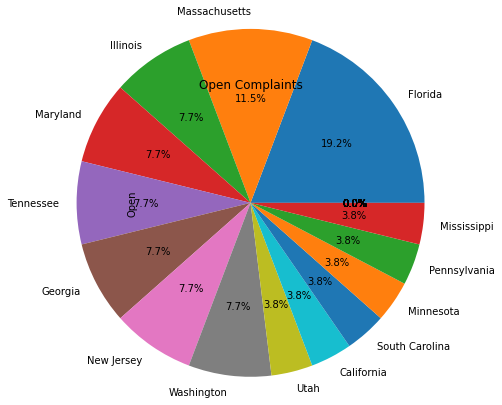

The above pie plot represents the statewise percentage of complaints that aren't resolved yet.


In [8]:
#Plotting Statewise Complaints [Open]
CG=Comcast_Dataset_Q3_Q4.groupby(['State','Status_New']).size().unstack().fillna(0).Open.sort_values(ascending=False)
CG.plot.pie(radius=2,autopct='%1.1f%%')
plt.title("Open Complaints")
plt.show()
print("The above pie plot represents the statewise percentage of complaints that aren't resolved yet.")

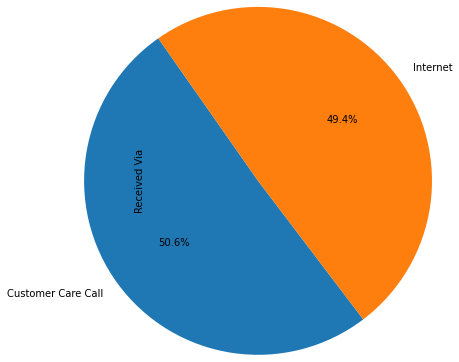

In [44]:
#Percentage of Complaints resolved till date, which are recived via Internet and Calls

Comcast_Dataset['Received Via'][Comcast_Dataset.Status_New=='Closed'].value_counts().plot.pie(radius=2,autopct='%1.1f%%', startangle = 125)
plt.show()

In [17]:
#Providing table with frequency of type of complaints

import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

ss=stopwords.words('english')
ss.append('comcast')

def StringCleanup(s):
    z=' '.join(i for i in s.lower().split() if i not in ss)
    z=''.join(i for i in z if i not in string.punctuation)
    z=''.join(i for i in z if i not in string.digits)
    z=' '.join(WordNetLemmatizer().lemmatize(i) for i in z.split())
    return (z)

Cleaned_C = [StringCleanup(i).split() for i in Comcast_Dataset['Customer Complaint']]

In [19]:
from gensim import corpora
from gensim.models import LdaModel

D = corpora.Dictionary(Cleaned_C)
DM = [D.doc2bow(i) for i in Cleaned_C]
LM = LdaModel(DM, num_topics=10, id2word=D, passes=30)

In [40]:
# Testing the gensim model to get word similarity values

pd.DataFrame(LM.show_topic(0,topn=10), columns=('Complaint Subject', 'Word Similarity Value'))

,Complaint Subject,Word Similarity Value
0,charge,0.123233
1,service,0.047936
2,switch,0.038108
3,intermittent,0.028612
4,get,0.028588
5,bait,0.025796
6,connectivity,0.021004
7,issue,0.020937
8,claim,0.018199
9,false,0.018120


In [37]:
# Retreiving Top Complaint Categories

top_complaints = pd.DataFrame([[j[0] for j in LM.show_topic(k,topn=5)] for k in range(10)]).T
top_complaints.columns = [f'Top-{i}' for i in range(1,11)]
top_complaints

,Top-1,Top-2,Top-3,Top-4,Top-5,Top-6,Top-7,Top-8,Top-9,Top-10
0,charge,data,cable,fee,throttling,billing,service,bill,service,internet
1,service,cap,internet,contract,internet,practice,internet,service,business,speed
2,switch,usage,month,price,comcastxfinity,issue,customer,pricing,failure,slow
3,intermittent,internet,outage,account,monopoly,unfair,xfinity,without,appointment,price
4,get,help,paying,year,fraudulent,complaint,complaint,charge,charging,connection


In [ ]:
#<<<---------------------------------THE END----------------------------------------->>>